
Loading file: ../data/matrice_routes_ordre_10.csv

Problem parameters:
- Number of cities: 10
- Collection points: [3, 7]

Using optimized parameters for this matrix size:
- Genetic: pop_size=20, generations=50
- Simulated Annealing: initial_temp=1000, cooling_rate=0.95
- Ant Colony: ants=10, iterations=50

Starting comparison...

=== Testing Genetic algorithm ===
Run 1: Cost=465 Time=0.04s Valid=True
Run 2: Cost=509 Time=0.05s Valid=True
Run 3: Cost=596 Time=0.05s Valid=True
Run 4: Cost=441 Time=0.04s Valid=True
Run 5: Cost=510 Time=0.04s Valid=True

=== Testing Simulated Annealing algorithm ===
Run 1: Cost=699 Time=0.00s Valid=True
Run 2: Cost=590 Time=0.00s Valid=True
Run 3: Cost=510 Time=0.00s Valid=True
Run 4: Cost=524 Time=0.00s Valid=True
Run 5: Cost=713 Time=0.00s Valid=True

=== Testing Ant Colony algorithm ===
Run 1: Cost=487 Time=0.20s Valid=True
Run 2: Cost=465 Time=0.19s Valid=True
Run 3: Cost=465 Time=0.20s Valid=True
Run 4: Cost=513 Time=0.20s Valid=True
Run 5: Cost=465

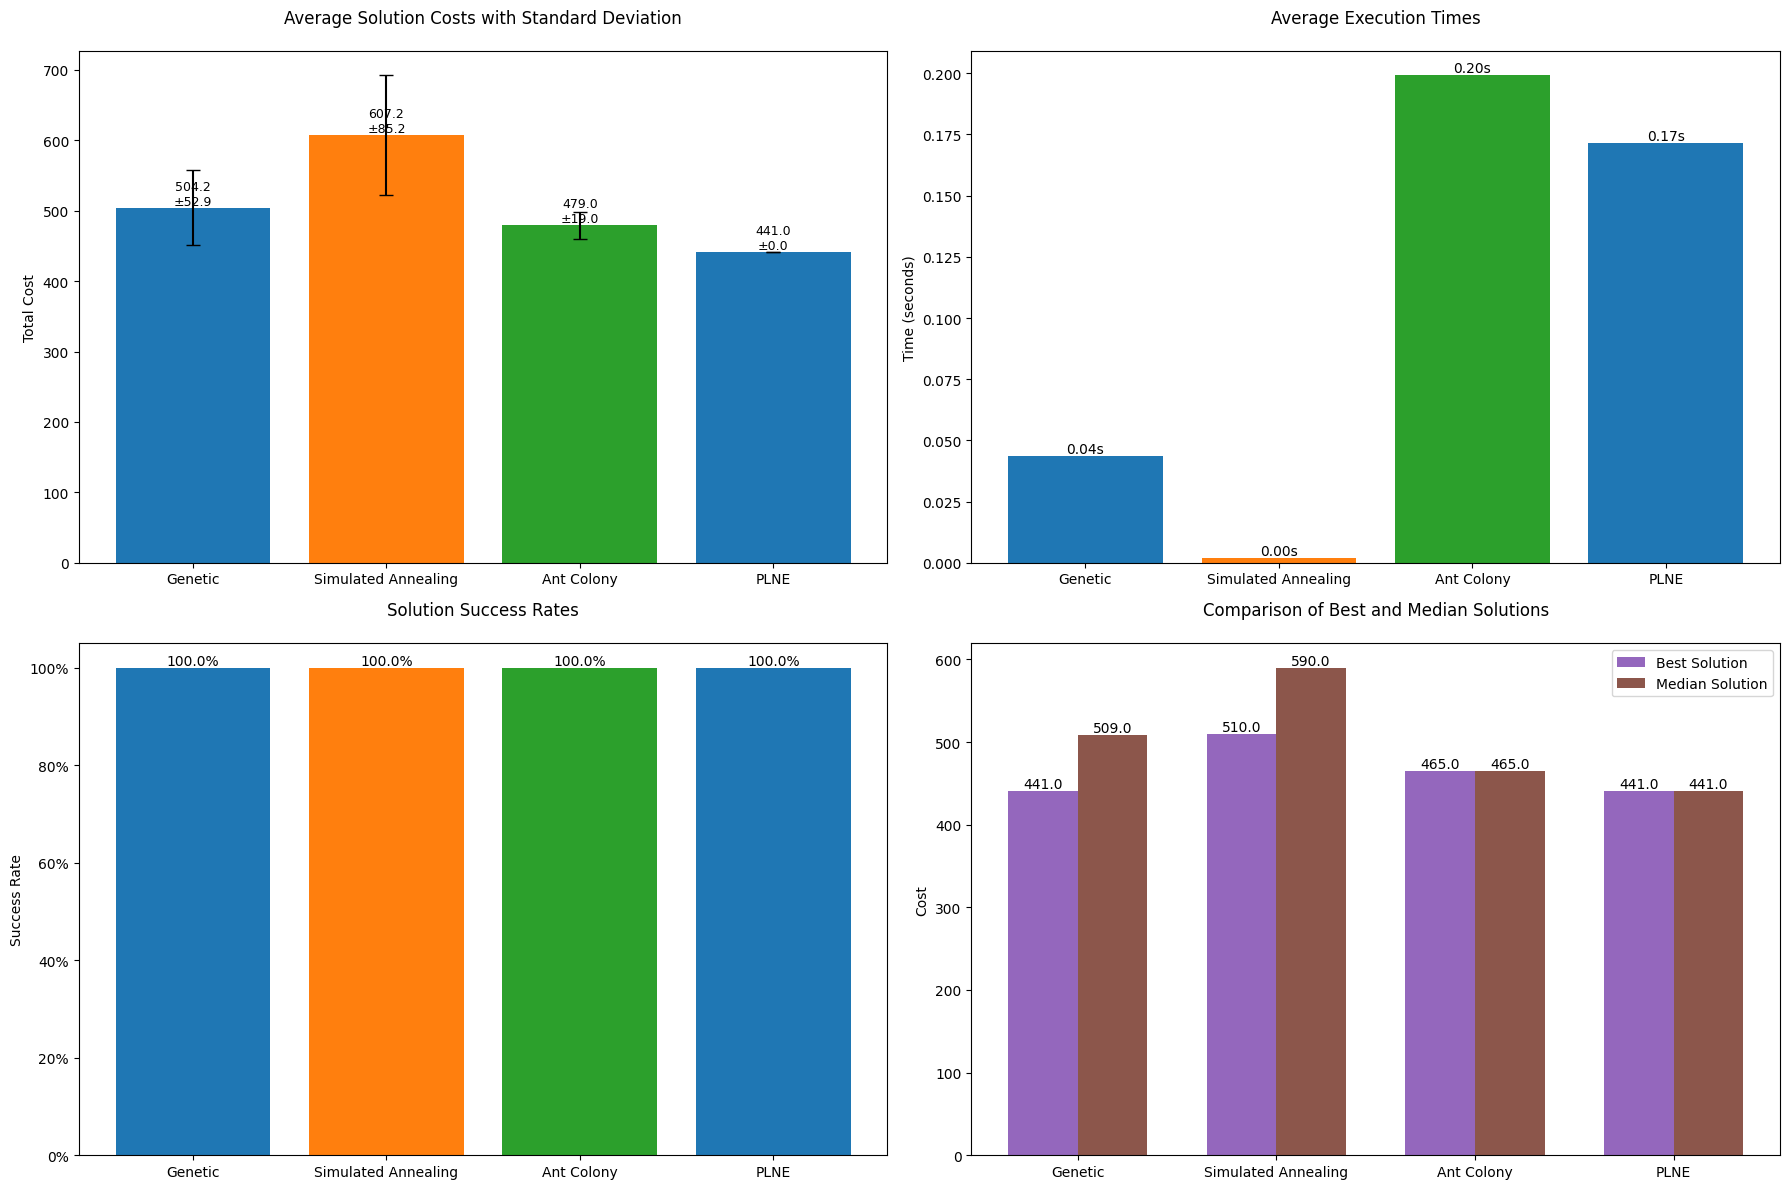


BEST SOLUTIONS FOUND:

Genetic:
Cost: 441.0
Path (simplified): [1, 3, 5, '...', 2, 8, 1]

Simulated Annealing:
Cost: 510.0
Path (simplified): [1, 7, 10, '...', 3, 5, 1]

Ant Colony:
Cost: 465.0
Path (simplified): [1, 3, 6, '...', 2, 8, 1]

PLNE:
Cost: 441.0
Path (simplified): [1, 3, 5, '...', 2, 8, 1]

Loading file: ../data/matrice_routes_ordre_20.csv

Problem parameters:
- Number of cities: 20
- Collection points: [5, 13]

Using optimized parameters for this matrix size:
- Genetic: pop_size=40, generations=100
- Simulated Annealing: initial_temp=2000, cooling_rate=0.95
- Ant Colony: ants=20, iterations=100

Starting comparison...

=== Testing Genetic algorithm ===
Run 1: Cost=950 Time=0.29s Valid=True
Run 2: Cost=943 Time=0.29s Valid=True
Run 3: Cost=934 Time=0.28s Valid=True
Run 4: Cost=978 Time=0.29s Valid=True
Run 5: Cost=916 Time=0.28s Valid=True

=== Testing Simulated Annealing algorithm ===
Run 1: Cost=1621 Time=0.00s Valid=True
Run 2: Cost=1632 Time=0.00s Valid=True
Run 3: Cos

KeyboardInterrupt: 

In [5]:
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict
import pandas as pd
from tabulate import tabulate
from matplotlib.ticker import PercentFormatter

# Paramètres optimaux par taille de matrice
optimal_parameters = {
    10: {
        "GA": {"population_size": 20, "generations": 50, "crossover_rate": 0.9, "mutation_rate": 0.2},
        "SA": {"initial_temp": 1000, "cooling_rate": 0.95, "n_iterations_per_temp": 50},
        "ACO": {"num_ants": 10, "iterations": 50, "alpha": 1, "beta": 2, "evaporation_rate": 0.5, "Q": 100},
    },
    20: {
        "GA": {"population_size": 40, "generations": 100, "crossover_rate": 0.9, "mutation_rate": 0.2},
        "SA": {"initial_temp": 2000, "cooling_rate": 0.95, "n_iterations_per_temp": 100},
        "ACO": {"num_ants": 20, "iterations": 100, "alpha": 1, "beta": 3, "evaporation_rate": 0.5, "Q": 100},
    },
    30: {
        "GA": {"population_size": 60, "generations": 150, "crossover_rate": 0.9, "mutation_rate": 0.15},
        "SA": {"initial_temp": 3000, "cooling_rate": 0.95, "n_iterations_per_temp": 150},
        "ACO": {"num_ants": 30, "iterations": 150, "alpha": 1, "beta": 4, "evaporation_rate": 0.4, "Q": 100},
    },
    40: {
        "GA": {"population_size": 80, "generations": 200, "crossover_rate": 0.9, "mutation_rate": 0.15},
        "SA": {"initial_temp": 4000, "cooling_rate": 0.95, "n_iterations_per_temp": 200},
        "ACO": {"num_ants": 40, "iterations": 200, "alpha": 1, "beta": 5, "evaporation_rate": 0.4, "Q": 100},
    },
    50: {
        "GA": {"population_size": 100, "generations": 250, "crossover_rate": 0.9, "mutation_rate": 0.1},
        "SA": {"initial_temp": 5000, "cooling_rate": 0.95, "n_iterations_per_temp": 250},
        "ACO": {"num_ants": 50, "iterations": 250, "alpha": 1, "beta": 5, "evaporation_rate": 0.3, "Q": 100},
    },
    75: {
        "GA": {"population_size": 150, "generations": 400, "crossover_rate": 0.9, "mutation_rate": 0.1},
        "SA": {"initial_temp": 7500, "cooling_rate": 0.95, "n_iterations_per_temp": 400},
        "ACO": {"num_ants": 75, "iterations": 400, "alpha": 1, "beta": 5, "evaporation_rate": 0.3, "Q": 100},
    },
    100: {
        "GA": {"population_size": 200, "generations": 500, "crossover_rate": 0.9, "mutation_rate": 0.05},
        "SA": {"initial_temp": 10000, "cooling_rate": 0.95, "n_iterations_per_temp": 500},
        "ACO": {"num_ants": 100, "iterations": 500, "alpha": 1, "beta": 5, "evaporation_rate": 0.2, "Q": 100},
    }
}


# ======================================================================
# FONCTIONS DE BASE ET CLASSES PRINCIPALES
# ======================================================================

def load_adjacency_matrix_and_collecte(file_path: str) -> Tuple[np.ndarray, List[int]]:
    """
    Charge la matrice d'adjacence et les points de collecte depuis un fichier CSV.
    
    Args:
        file_path: Chemin vers le fichier CSV contenant la matrice et les points de collecte
        
    Returns:
        Tuple contenant:
        - La matrice d'adjacence (numpy.ndarray)
        - La liste des points de collecte (List[int])
        
    Raises:
        ValueError: Si le fichier n'est pas trouvé ou s'il y a une erreur de lecture
    """
    try:
        with open(file_path, 'r') as f:
            lines = [line.strip() for line in f if line.strip()]
        points_collecte = list(map(int, lines[-1].split(';')))
        matrix = [list(map(int, line.split(';'))) for line in lines[:-1]]
        return np.array(matrix), points_collecte
    except Exception as e:
        raise ValueError(f"Erreur de lecture du fichier {file_path}: {str(e)}")

class BaseTSP:
    """
    Classe de base pour les algorithmes TSP avec contraintes de collecte.
    Implémente les fonctionnalités communes à tous les algorithmes.
    """
    
    def __init__(self, matrix: np.ndarray, collecte_points: List[int], start_node: int = 1):
        """
        Initialise le solveur TSP avec contraintes.
        
        Args:
            matrix: Matrice d'adjacence des distances entre villes
            collecte_points: Liste des nœuds de collecte obligatoires
            start_node: Nœud de départ et d'arrivée (par défaut: 1)
        """
        self.matrix = matrix
        self.collecte = set(collecte_points)
        self.start_node = start_node
        self.num_cities = len(matrix)
        self.best_solution = None
        self.best_cost = float('inf')
        
    def is_valid_path(self, path: List[int]) -> bool:
        """
        Vérifie si un chemin satisfait toutes les contraintes.
        
        Args:
            path: Liste représentant le chemin à vérifier
            
        Returns:
            bool: True si le chemin est valide, False sinon
        """
        if path is None:
            return False
        # Doit commencer et finir au start_node et avoir la bonne longueur
        if (len(path) != self.num_cities + 1 or path[0] != self.start_node or path[-1] != self.start_node):
            return False
        # Le deuxième nœud doit être un point de collecte, l'avant-dernier ne doit pas en être un
        if path[1] not in self.collecte or path[-2] in self.collecte:
            return False
        # Toutes les villes doivent être visitées exactement une fois (sauf départ/arrivée)
        if len(set(path)) != self.num_cities:
            return False
        # Tous les segments doivent être valides (pas de -1 dans la matrice)
        for i in range(len(path)-1):
            if self.matrix[path[i]-1][path[i+1]-1] == -1:
                return False
        return True

    def calculate_cost(self, path: List[int]) -> int:
        """
        Calcule le coût total d'un chemin.
        
        Args:
            path: Liste représentant le chemin
            
        Returns:
            int: Coût total du chemin (float('inf') si chemin invalide)
        """
        if path is None or not self.is_valid_path(path):
            return float('inf')
        return sum(self.matrix[path[i]-1][path[i+1]-1] for i in range(len(path)-1))

    def _generate_random_path(self) -> List[int]:
        """
        Génère un chemin aléatoire valide respectant les contraintes.
        
        Returns:
            List[int]: Un chemin valide ou None si impossible à générer
        """
        while True:
            path = [self.start_node]
            unvisited = set(range(1, self.num_cities+1)) - {self.start_node}
            
            # Premier mouvement vers un point de collecte aléatoire valide
            collect_candidates = [c for c in self.collecte 
                                if c in unvisited 
                                and self.matrix[self.start_node-1][c-1] != -1]
            if not collect_candidates:
                continue
                
            collect_point = random.choice(collect_candidates)
            path.append(collect_point)
            unvisited.remove(collect_point)
            
            # Construction aléatoire du reste du chemin
            while unvisited:
                last = path[-1]
                candidates = [c for c in range(1, self.num_cities+1) 
                            if c in unvisited 
                            and self.matrix[last-1][c-1] != -1]
                
                if not candidates:
                    break
                    
                next_city = random.choice(candidates)
                path.append(next_city)
                unvisited.remove(next_city)
            
            # Retour au point de départ si possible
            if not unvisited and self.matrix[path[-1]-1][self.start_node-1] != -1:
                path.append(self.start_node)
                if self.is_valid_path(path):
                    return path
        return None

# ======================================================================
# IMPLÉMENTATION DES ALGORITHMES
# ======================================================================

class GeneticTSP(BaseTSP):
    """Algorithme génétique pour le TSP avec contraintes de collecte."""
    
    def solve(self, population_size: int = 50, generations: int = 100, 
             mutation_rate: float = 0.1) -> Tuple[List[int], float]:
        """
        Résout le problème TSP avec contraintes en utilisant un algorithme génétique.
        
        Args:
            population_size: Taille de la population
            generations: Nombre de générations
            mutation_rate: Probabilité de mutation
            
        Returns:
            Tuple contenant:
            - La meilleure solution trouvée (List[int])
            - Le coût de cette solution (float)
        """
        # Initialisation de la population
        population = [self._generate_random_path() for _ in range(population_size)]
        population = [p for p in population if p is not None]
        
        if not population:
            return None, float('inf')
        
        # Évolution sur plusieurs générations
        for _ in range(generations):
            # Évaluation et sélection
            population.sort(key=lambda x: self.calculate_cost(x))
            self.best_solution = population[0]
            self.best_cost = self.calculate_cost(population[0])
            
            # Sélection par tournoi
            new_population = []
            for _ in range(population_size):
                candidates = random.sample(population, min(3, len(population)))
                winner = min(candidates, key=lambda x: self.calculate_cost(x))
                new_population.append(winner.copy())
            
            # Croisement
            for i in range(0, len(new_population)-1, 2):
                if random.random() < 0.8:  # Probabilité de croisement
                    child1, child2 = self._crossover(new_population[i], new_population[i+1])
                    if child1 and self.is_valid_path(child1):
                        new_population[i] = child1
                    if child2 and self.is_valid_path(child2):
                        new_population[i+1] = child2
            
            # Mutation
            for i in range(len(new_population)):
                if random.random() < mutation_rate:
                    mutated = self._mutate(new_population[i])
                    if mutated and self.is_valid_path(mutated):
                        new_population[i] = mutated
            
            population = new_population
        
        return self.best_solution, self.best_cost
    
    def _crossover(self, parent1: List[int], parent2: List[int]) -> Tuple[List[int], List[int]]:
        """Opérateur de croisement OX (Order Crossover) pour TSP."""
        if len(parent1) <= 3 or len(parent2) <= 3:
            return parent1, parent2
            
        # Sélection d'un segment aléatoire à garder du parent1
        start, end = sorted(random.sample(range(1, len(parent1)-1), 2))
        segment = parent1[start:end]
        
        # Construction des enfants
        child1 = [city for city in parent2 if city not in segment][:start] + segment + \
                [city for city in parent2 if city not in segment][start:]
        child2 = [city for city in parent1 if city not in segment][:start] + segment + \
                [city for city in parent1 if city not in segment][start:]
        
        # Correction des extrémités
        child1[0] = child1[-1] = self.start_node
        child2[0] = child2[-1] = self.start_node
        
        return child1, child2
    
    def _mutate(self, path: List[int]) -> List[int]:
        """Opérateur de mutation par inversion de sous-séquence."""
        if len(path) <= 3:
            return path.copy()
            
        # Ne pas muter les points fixes (départ/arrivée/collecte)
        mutable = list(range(1, len(path)-1))
        if len(path) > 3:
            mutable.remove(1)  # Premier point de collecte
        if len(path) > 4:
            mutable.remove(len(path)-2)  # Avant-dernier point
            
        if len(mutable) < 2:
            return path.copy()
            
        # Sélection aléatoire d'une sous-séquence à inverser
        i, j = sorted(random.sample(mutable, 2))
        new_path = path.copy()
        new_path[i:j+1] = new_path[i:j+1][::-1]
        
        return new_path if self.is_valid_path(new_path) else path.copy()

class SimulatedAnnealingTSP(BaseTSP):
    """Recuit simulé pour le TSP avec contraintes de collecte."""
    
    def solve(self, initial_temp: float = 10000, cooling_rate: float = 0.995,
             max_iter: int = 10000) -> Tuple[List[int], float]:
        """
        Résout le problème TSP avec contraintes en utilisant le recuit simulé.
        
        Args:
            initial_temp: Température initiale
            cooling_rate: Taux de refroidissement
            max_iter: Nombre maximum d'itérations
            
        Returns:
            Tuple contenant:
            - La meilleure solution trouvée (List[int])
            - Le coût de cette solution (float)
        """
        current_solution = self._generate_random_path()
        if current_solution is None:
            return None, float('inf')
            
        current_cost = self.calculate_cost(current_solution)
        self.best_solution = current_solution.copy()
        self.best_cost = current_cost
        temp = initial_temp
        iter_count = 0
        
        while temp > 1 and iter_count < max_iter:
            # Génération d'un voisin
            neighbor = self._get_neighbor(current_solution)
            if neighbor is None:
                continue
                
            neighbor_cost = self.calculate_cost(neighbor)
            
            # Critère d'acceptation
            if neighbor_cost < current_cost or random.random() < math.exp(-(neighbor_cost - current_cost)/temp):
                current_solution, current_cost = neighbor, neighbor_cost
                if current_cost < self.best_cost:
                    self.best_solution, self.best_cost = current_solution, current_cost
            
            # Refroidissement
            temp *= cooling_rate
            iter_count += 1
        
        return self.best_solution, self.best_cost
    
    def _get_neighbor(self, path: List[int]) -> List[int]:
        """Génère un voisin valide par échange de deux villes."""
        if len(path) <= 3:
            return path.copy()
            
        # Ne pas modifier les points fixes
        mutable = list(range(1, len(path)-1))
        if len(path) > 3:
            mutable.remove(1)  # Premier point de collecte
        if len(path) > 4:
            mutable.remove(len(path)-2)  # Avant-dernier point
            
        if len(mutable) < 2:
            return path.copy()
            
        # Échange de deux villes aléatoires
        i, j = random.sample(mutable, 2)
        new_path = path.copy()
        new_path[i], new_path[j] = new_path[j], new_path[i]
        
        return new_path if self.is_valid_path(new_path) else path.copy()

class ACO_TSP(BaseTSP):
    """Colonie de fourmis pour le TSP avec contraintes de collecte."""
    
    def solve(self, num_ants: int = 20, iterations: int = 100,
             alpha: float = 1.0, beta: float = 2.0,
             evaporation_rate: float = 0.5, Q: float = 100.0) -> Tuple[List[int], float]:
        """
        Résout le problème TSP avec contraintes en utilisant une colonie de fourmis.
        
        Args:
            num_ants: Nombre de fourmis par itération
            iterations: Nombre d'itérations
            alpha: Importance des phéromones
            beta: Importance de l'information heuristique
            evaporation_rate: Taux d'évaporation des phéromones
            Q: Constante pour le dépôt de phéromones
            
        Returns:
            Tuple contenant:
            - La meilleure solution trouvée (List[int])
            - Le coût de cette solution (float)
        """
        # Initialisation des phéromones
        self.pheromone = np.ones((self.num_cities + 1, self.num_cities + 1)) * 0.1
        best_global_solution = None
        best_global_cost = float('inf')
        
        for _ in range(iterations):
            solutions = []
            for _ in range(num_ants):
                solution = self._construct_ant_solution(alpha, beta)
                if solution:
                    solutions.append(solution)
            
            if not solutions:
                continue
                
            # Mise à jour des phéromones
            for solution in solutions:
                cost = self.calculate_cost(solution)
                delta = Q / cost
                for i in range(len(solution)-1):
                    self.pheromone[solution[i]][solution[i+1]] += delta
            
            # Évaporation
            self.pheromone *= (1 - evaporation_rate)
            
            # Mise à jour de la meilleure solution globale
            current_best = min(solutions, key=lambda x: self.calculate_cost(x))
            current_cost = self.calculate_cost(current_best)
            
            if current_cost < best_global_cost:
                best_global_solution, best_global_cost = current_best, current_cost
        
        self.best_solution, self.best_cost = best_global_solution, best_global_cost
        return self.best_solution, self.best_cost
    
    def _construct_ant_solution(self, alpha: float, beta: float) -> List[int]:
        """Construit une solution pour une fourmi en utilisant les règles de transition."""
        path = [self.start_node]
        unvisited = set(range(1, self.num_cities+1)) - {self.start_node}

        # Premier mouvement vers un point de collecte
        collect_candidates = [c for c in self.collecte 
                               if c in unvisited 
                               and self.matrix[self.start_node-1][c-1] != -1]
        if not collect_candidates:
            return None

        # Choix probabiliste du premier point de collecte
        probs = np.array([
            (self.pheromone[self.start_node][c] ** alpha) * ((1.0 / (self.matrix[self.start_node-1][c-1] or 1)) ** beta)
            for c in collect_candidates
        ])
        probs /= probs.sum()
        first_collect = np.random.choice(collect_candidates, p=probs)
        path.append(first_collect)
        unvisited.remove(first_collect)

        # Construction du reste du chemin
        while unvisited:
            last = path[-1]
            candidates = [c for c in unvisited if self.matrix[last-1][c-1] != -1]

            if not candidates:
                return None

            # Choix probabiliste de la prochaine ville
            probs = np.array([
                (self.pheromone[last][c] ** alpha) * ((1.0 / (self.matrix[last-1][c-1] or 1)) ** beta)
                for c in candidates
            ])
            probs /= probs.sum()
            next_city = np.random.choice(candidates, p=probs)
            path.append(next_city)
            unvisited.remove(next_city)

        # Retour au point de départ
        if self.matrix[path[-1]-1][self.start_node-1] != -1:
            path.append(self.start_node)
            return path if self.is_valid_path(path) else None
        return None
    

class PLNETSP(BaseTSP):
    """Programmation Linéaire en Nombres Entiers pour résoudre le TSP avec contraintes de collecte."""
    
    def solve(self, time_limit: int = 300) -> Tuple[List[int], float]:
        """
        Résout le TSP avec contraintes en utilisant un modèle de PLNE.
        
        Args:
            time_limit: Temps limite pour résoudre (en secondes)
        
        Returns:
            Tuple contenant:
            - Le chemin optimal trouvé (List[int])
            - Le coût total (float)
        """
        import pulp
        
        n = self.num_cities
        cost_matrix = self.matrix.copy()
        INF = 10**6  # Valeur élevée pour remplacer les -1 (inexistants)
        cost_matrix[cost_matrix == -1] = INF

        # Variables de décision
        prob = pulp.LpProblem("TSP_with_Collecte_Constraints", pulp.LpMinimize)
        x = pulp.LpVariable.dicts("x", 
            ((i, j) for i in range(n) for j in range(n) if i != j and cost_matrix[i, j] < INF), 
            cat='Binary'
        )
        u = pulp.LpVariable.dicts("u", range(n), lowBound=0, upBound=n-1, cat='Integer')

        # Fonction objectif : minimiser la distance totale
        prob += pulp.lpSum(cost_matrix[i, j] * x[i, j] for (i, j) in x)

        # Contraintes : chaque ville a exactement une arrivée et un départ
        for i in range(n):
            prob += pulp.lpSum(x[i, j] for j in range(n) if (i, j) in x) == 1
            prob += pulp.lpSum(x[j, i] for j in range(n) if (j, i) in x) == 1

        # Sous-tours : contraintes de Miller-Tucker-Zemlin (MTZ)
        for i in range(1, n):
            for j in range(1, n):
                if i != j and (i, j) in x:
                    prob += u[i] - u[j] + n * x[i, j] <= n - 1

        # Contraintes spécifiques aux points de collecte
        start = self.start_node - 1
        collecte_zero = [p - 1 for p in self.collecte]  # Ajusté pour 0-indexé
        non_collecte = [i for i in range(n) if (i+1) not in self.collecte]

        prob += pulp.lpSum(x[start, j] for j in collecte_zero if (start, j) in x) == 1
        prob += pulp.lpSum(x[i, start] for i in non_collecte if (i, start) in x) == 1

        # Résolution avec un solveur (par défaut CBC)
        solver = pulp.PULP_CBC_CMD(msg=False, timeLimit=time_limit)
        start_time = time.time()
        prob.solve(solver)
        end_time = time.time()

        if pulp.LpStatus[prob.status] not in ["Optimal", "Feasible"]:
            return None, float('inf')

        # Reconstruction du chemin à partir de la solution
        tour_dict = {i: j for (i, j) in x if pulp.value(x[i, j]) > 0.5}
        path = [start]
        while True:
            next_city = tour_dict.get(path[-1])
            if next_city is None or next_city == start:
                break
            path.append(next_city)
        path.append(start)

        # Passage de 0-indexé à 1-indexé
        final_path = [node + 1 for node in path]
        self.best_solution = final_path
        self.best_cost = pulp.value(prob.objective)
        return self.best_solution, self.best_cost



# ======================================================================
# FONCTIONS DE COMPARAISON ET VISUALISATION
# ======================================================================

def compare_algorithms(matrix: np.ndarray, collecte: List[int], start_node: int = 1, runs: int = 5) -> Dict:
    """
    Compare les différents algorithmes sur plusieurs exécutions.
    
    Args:
        matrix: Matrice d'adjacence
        collecte: Liste des points de collecte
        start_node: Nœud de départ (défaut: 1)
        runs: Nombre d'exécutions par algorithme (défaut: 5)
        
    Returns:
        Dict: Dictionnaire contenant les résultats pour chaque algorithme
    """
    algorithms = {
        "Genetic": GeneticTSP,
        "Simulated Annealing": SimulatedAnnealingTSP,
        "Ant Colony": ACO_TSP,
        "PLNE": PLNETSP
    }
    
    # Initialisation des résultats
    results = {
        name: {
            'costs': [], 
            'times': [], 
            'valid': [],
            'solutions': []
        } 
        for name in algorithms
    }
    
    for name, algorithm_class in algorithms.items():
        print(f"\n=== Testing {name} algorithm ===")
        for run in range(runs):
            solver = algorithm_class(matrix, collecte, start_node)
            start_time = time.time()
            
            try:
                matrix_size = len(matrix)
                params = optimal_parameters.get(matrix_size, None)

                if name == "Genetic":
                    if params:
                        ga_params = params["GA"]
                        solution, cost = solver.solve(
                            population_size=ga_params["population_size"],
                            generations=ga_params["generations"],
                            mutation_rate=ga_params["mutation_rate"]
                        )
                    else:
                        solution, cost = solver.solve()  # Paramètres par défaut
                elif name == "Simulated Annealing":
                    if params:
                        sa_params = params["SA"]
                        solution, cost = solver.solve(
                            initial_temp=sa_params["initial_temp"],
                            cooling_rate=sa_params["cooling_rate"]
                        )
                    else:
                        solution, cost = solver.solve()
                elif name == "Ant Colony":
                    if params:
                        aco_params = params["ACO"]
                        solution, cost = solver.solve(
                            num_ants=aco_params["num_ants"],
                            iterations=aco_params["iterations"],
                            alpha=aco_params["alpha"],
                            beta=aco_params["beta"],
                            evaporation_rate=aco_params["evaporation_rate"],
                            Q=aco_params["Q"]
                        )
                    else:
                        solution, cost = solver.solve()
                else:  # PLNE
                    solution, cost = solver.solve(time_limit=300)


                
                valid = solver.is_valid_path(solution)
            except Exception as e:
                print(f"Error in {name} run {run+1}: {str(e)}")
                solution, cost, valid = None, float('inf'), False
            
            exec_time = time.time() - start_time
            results[name]['costs'].append(cost if solution else float('inf'))
            results[name]['times'].append(exec_time)
            results[name]['valid'].append(valid)
            results[name]['solutions'].append(solution)
            
            print(f"Run {run+1}: Cost={cost if solution else 'INF'} Time={exec_time:.2f}s Valid={valid}")
    
    # Affichage des résultats
    display_comparison_results(results, len(matrix))
    
    return results

def display_comparison_results(results: Dict, matrix_size: int):
    """
    Affiche les résultats de comparaison de manière professionnelle.
    
    Args:
        results: Dictionnaire des résultats
        matrix_size: Taille de la matrice (nombre de villes)
    """
    # Préparation des données pour le tableau
    table_data = []
    cost_data = []
    time_data = []
    success_data = []
    
    # Calcul des statistiques pour chaque algorithme
    for algo, values in results.items():
        valid_costs = [c for c, v in zip(values['costs'], values['valid']) if v]
        valid_times = [t for t, v in zip(values['times'], values['valid']) if v]
        
        if valid_costs:
            avg_cost = np.mean(valid_costs)
            std_cost = np.std(valid_costs)
            median_cost = np.median(valid_costs)
            min_cost = min(valid_costs)
            avg_time = np.mean(valid_times)
            success_rate = sum(values['valid'])/len(values['valid'])
        else:
            avg_cost = std_cost = median_cost = min_cost = avg_time = success_rate = float('nan')
        
        table_data.append({
            'Algorithm': algo,
            'Success Rate': f"{success_rate:.1%}",
            'Avg Cost': f"{avg_cost:.1f} ± {std_cost:.1f}",
            'Min Cost': f"{min_cost:.1f}",
            'Median Cost': f"{median_cost:.1f}",
            'Avg Time (s)': f"{avg_time:.2f}"
        })
        
        # Données pour les graphiques
        cost_data.append({
            'Algorithm': algo,
            'Avg': avg_cost,
            'Std': std_cost,
            'Min': min_cost,
            'Median': median_cost
        })
        
        time_data.append(avg_time)
        success_data.append(success_rate)
    
    # Création du DataFrame pour l'affichage
    df = pd.DataFrame(table_data)
    
    # Affichage du tableau principal
    print(f"\n{'='*60}")
    print(f"COMPARATIVE RESULTS FOR MATRIX SIZE {matrix_size}")
    print(f"{'='*60}\n")
    print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))
    
    # Création des visualisations
    plt.figure(figsize=(18, 12))
    
    # Graphique 1: Comparaison des coûts
    plt.subplot(2, 2, 1)
    algo_names = [x['Algorithm'] for x in cost_data]
    avg_costs = [x['Avg'] for x in cost_data]
    std_costs = [x['Std'] for x in cost_data]
    
    bars = plt.bar(algo_names, avg_costs, yerr=std_costs, capsize=5, 
                  color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title('Average Solution Costs with Standard Deviation', pad=20)
    plt.ylabel('Total Cost')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                f'{height:.1f}\n±{std_costs[bars.index(bar)]:.1f}',
                ha='center', va='bottom', fontsize=9)
    
    # Graphique 2: Comparaison des temps
    plt.subplot(2, 2, 2)
    bars = plt.bar(algo_names, time_data, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title('Average Execution Times', pad=20)
    plt.ylabel('Time (seconds)')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                f'{height:.2f}s',
                ha='center', va='bottom')
    
    # Graphique 3: Taux de succès
    plt.subplot(2, 2, 3)
    bars = plt.bar(algo_names, success_data, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title('Solution Success Rates', pad=20)
    plt.ylabel('Success Rate')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                f'{height:.1%}',
                ha='center', va='bottom')
    
    # Graphique 4: Comparaison des meilleures solutions
    plt.subplot(2, 2, 4)
    min_costs = [x['Min'] for x in cost_data]
    median_costs = [x['Median'] for x in cost_data]
    
    x = np.arange(len(algo_names))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, min_costs, width, label='Best Solution', color='#9467bd')
    bars2 = plt.bar(x + width/2, median_costs, width, label='Median Solution', color='#8c564b')
    
    plt.title('Comparison of Best and Median Solutions', pad=20)
    plt.ylabel('Cost')
    plt.xticks(x, algo_names)
    plt.legend()
    
    for bar in bars1:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                f'{height:.1f}',
                ha='center', va='bottom')
    
    for bar in bars2:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, 
                f'{height:.1f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Affichage des meilleures solutions trouvées
    print("\nBEST SOLUTIONS FOUND:")
    for algo, values in results.items():
        valid_indices = [i for i, v in enumerate(values['valid']) if v]
        if valid_indices:
            best_idx = min(valid_indices, key=lambda i: values['costs'][i])
            solution = values['solutions'][best_idx]
            cost = values['costs'][best_idx]
            
            # Correction ici : cast tous les éléments en int pur
            simplified_solution = [int(x) for x in solution]
            
            print(f"\n{algo}:")
            print(f"Cost: {cost:.1f}")
            print("Path (simplified):", simplified_solution[:3] + ["..."] + simplified_solution[-3:])


# ======================================================================
# EXÉCUTION PRINCIPALE
# ======================================================================

if __name__ == "__main__":
    # Liste des fichiers de matrices à tester
    # Liste des fichiers de matrices
    file_list = [
        "../data/matrice_routes_ordre_10.csv",
        "../data/matrice_routes_ordre_20.csv",
        "../data/matrice_routes_ordre_30.csv",
        "../data/matrice_routes_ordre_40_Difficile.csv",
        "../data/matrice_routes_ordre_50.csv",
        "../data/matrice_routes_ordre_75.csv",
        "../data/matrice_routes_ordre_100.csv",
    ]


    
    # Exécution des comparaisons pour chaque fichier
    for file_path in file_list:
        try:
            print(f"\n{'='*80}")
            print(f"Loading file: {file_path}")
            matrix, collecte = load_adjacency_matrix_and_collecte(file_path)
            print(f"\nProblem parameters:")
            print(f"- Number of cities: {len(matrix)}")
            print(f"- Collection points: {collecte}")
            
            # Paramètres adaptés à la taille de la matrice
            size = len(matrix)
            if size in params:
                print("\nUsing optimized parameters for this matrix size:")
                print(f"- Genetic: pop_size={params[size]['GA'][0]}, generations={params[size]['GA'][1]}")
                print(f"- Simulated Annealing: initial_temp={params[size]['SA'][0]}, cooling_rate={params[size]['SA'][1]}")
                print(f"- Ant Colony: ants={params[size]['ACO'][0]}, iterations={params[size]['ACO'][1]}")
            
            print(f"\nStarting comparison...")
            comparison_results = compare_algorithms(matrix, collecte, start_node=1, runs=5)
            
        except Exception as e:
            print(f"\nError processing file {file_path}: {str(e)}")